In [1]:
import matplotlib.pyplot as plt
from plots.mpltoolkit import load_mpl_presets, mpl_loc, fancy_legend, named_colors
import numpy as np
import vice
import sys
import os
sys.path.append("..")
from src import analytic
print(sys.version_info)
load_mpl_presets()

/var/home/johnson.7419.local/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


sys.version_info(major=3, minor=10, micro=4, releaselevel='final', serial=0)


9.090909090909092
4.761904761904762
-7.142857142857142
-24.999999999999996


/home/johnson.7419/Desktop/Research/galchem/outflows/notebooks/../src/analytic.py:33: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 / s
/home/johnson.7419/Desktop/Research/galchem/outflows/notebooks/../src/analytic.py:39: RuntimeWarning: invalid value encountered in double_scalars
  term1 *= (1 - m.exp(-time / self.harmonic_timescale(self.taudep,
/home/johnson.7419/Desktop/Research/galchem/outflows/notebooks/../src/analytic.py:33: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 / s
/home/johnson.7419/Desktop/Research/galchem/outflows/notebooks/../src/analytic.py:39: RuntimeWarning: invalid value encountered in double_scalars
  term1 *= (1 - m.exp(-time / self.harmonic_timescale(self.taudep,


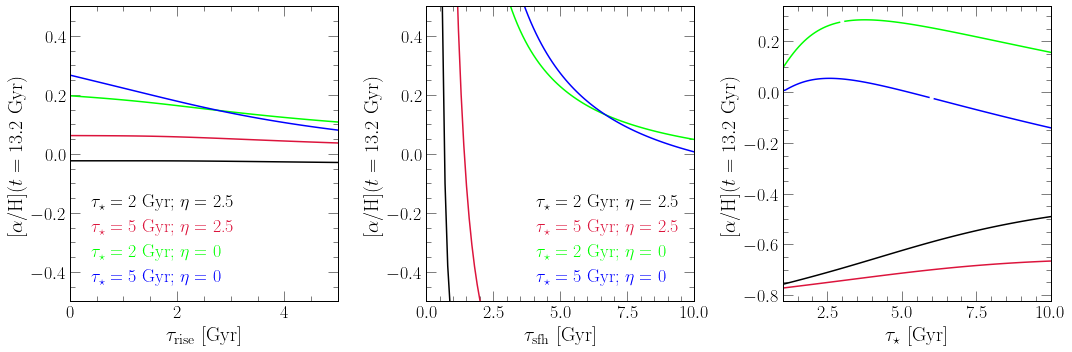

In [15]:
fig = plt.figure(figsize = (15, 5))
axes = []
for i in range(3):
    axes.append(fig.add_subplot(131 + i))
    axes[i].set_ylabel(r"[$\alpha$/H]($t = 13.2$ Gyr)")
axes[0].set_xlabel(r"$\tau_\text{rise}$ [Gyr]")
axes[0].set_xlim([0, 5])
axes[0].set_ylim([-0.5, 0.5])
axes[1].set_xlabel(r"$\tau_\text{sfh}$ [Gyr]")
axes[1].set_xlim([0, 10])
axes[1].set_ylim([-0.5, 0.5])
axes[2].set_xlabel(r"$\tau_\star$ [Gyr]")
axes[2].set_xlim([1, 10])
# axes[2].set_ylim([-0.5, 0.5])

taustar = [2, 5, 2, 5]
eta = [2.5, 2.5, 0, 0]
colors = ["black", "crimson", "lime", "blue"]

Zalpha = analytic.Zalpha()

for i in range(len(taustar)):
    xvals = np.linspace(0.01, 5, 100)
    yvals = len(xvals) * [0.]
    Zalpha.taustar = taustar[i]
    Zalpha.eta = eta[i]
    if Zalpha.eta == 0:
        Zalpha.y_alpha = 0.0029
    elif Zalpha.eta == 2.5:
        Zalpha.y_alpha = 0.015
    for j in range(len(xvals)):
        Zalpha.taurise = xvals[j]
        yvals[j] = np.log10(Zalpha(13.2) / vice.solar_z['o'])
    kwargs = {
        "c": named_colors()[colors[i]],
        "label": r"$\tau_\star = %g$ Gyr; $\eta$ = %g" % (Zalpha.taustar, Zalpha.eta)
    }
    axes[0].plot(xvals, yvals, **kwargs)

kwargs = {
    "loc": mpl_loc("lower left"),
    "handlelength": 0,
    "ncol": 1
}
leg = axes[0].legend(**kwargs)
fancy_legend(leg, colors)

Zalpha.taurise = 2
for i in range(len(taustar)):
    xvals = np.linspace(0.1, 10, 100)
    yvals = len(xvals) * [0.]
    Zalpha.taustar = taustar[i]
    Zalpha.eta = eta[i]
    if Zalpha.eta == 0:
        Zalpha.y_alpha = 0.0029
    elif Zalpha.eta == 2.5:
        Zalpha.y_alpha = 0.0015
    for j in range(len(xvals)):
        Zalpha.tausfh = xvals[j]
        yvals[j] = np.log10(Zalpha(13.2) / vice.solar_z['o'])
    kwargs = {
        "c": named_colors()[colors[i]],
        "label": r"$\tau_\star = %g$ Gyr; $\eta$ = %g" % (Zalpha.taustar, Zalpha.eta)
    }
    axes[1].plot(xvals, yvals, **kwargs)

kwargs = {
    "loc": mpl_loc("lower right"),
    "handlelength": 0,
    "ncol": 1
}
leg = axes[1].legend(**kwargs)
fancy_legend(leg, colors)
        
tausfh = [5, 10, 5, 10]
# Zalpha.tausfh = 6
for i in range(len(tausfh)):
    xvals = np.linspace(1, 10, 100)
    yvals = len(xvals) * [0.]
    Zalpha.tausfh = tausfh[i]
    Zalpha.eta = eta[i]
    if Zalpha.eta == 0:
        Zalpha.y_alpha = 0.0029
    elif Zalpha.eta == 2.5:
        Zalpha.y_alpha == 0.015
    for j in range(len(xvals)):
        Zalpha.taustar = xvals[j]
        yvals[j] = np.log10(Zalpha(13.2) / vice.solar_z['o'])
    kwargs = {
        "c": named_colors()[colors[i]],
        "label": r"$\tau_\text{sfh} = %g Gyr; $\eta$ = %g" % (Zalpha.tausfh, Zalpha.eta)
    }
    print(Zalpha.harmonic_timescale(Zalpha.taustar / (1 + Zalpha.eta - 0.4), Zalpha.tausfh))
    axes[2].plot(xvals, yvals, **kwargs)

plt.tight_layout()
plt.show()